<a href="https://colab.research.google.com/github/FabianaDutra/ImersaoDados_ALURA/blob/main/ALURA_IMERSAO_DADOS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORTS

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETROS

In [361]:
plt.rcParams["figure.figsize"] = (20,8)

# AULA 01

## CARREGANDO OS DADOS

In [124]:
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## ANALISANDO OS DADOS:

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [126]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [127]:
df.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2908,NaN,Sumaré,São Paulo,350,3,3,23,R$ 15.000\n /Mês
2315,NaN,Alto de Pinheiros,São Paulo,316,3,3,6,R$ 6.000.000
6925,Rua Grajaú,Sumaré,São Paulo,250,3,4,2,R$ 2.690.000
5617,Rua Joaquim de Almeida,Mirandópolis,São Paulo,95,3,1,2,R$ 1.100.000
7632,"Rua Áurea Batista dos Santos, 926",Vila Morse,São Paulo,240,3,3,2,R$ 850.000


In [ ]:
df.shape

### <b>OBSERVAÇÕES:</b>

- BASE DADOS apresentando valores nulos/faltantes nos campos Rua e Bairro a serem tratados.
- Campo VALOR representado como objeto(string) precisa ser convertido para FLOAT

### RUA

In [128]:
print("Variável RUA possui:",df["Rua"].isnull().value_counts()[0]," valores validos/preenchidos.\n")
print("Variável RUA possui:",df["Rua"].isnull().value_counts()[1]," valores em branco/ não preenchidos.\n")

Variável RUA possui: 6574  valores validos/preenchidos.

Variável RUA possui: 3434  valores em branco/ não preenchidos.



In [129]:
print("Variável RUA possui:",len(df["Rua"].unique())," valores distintos preenchidos.\n")


Variável RUA possui: 3131  valores distintos preenchidos.



### BAIRRO

In [130]:
print("Variável BAIRRO possui:",len(df["Bairro"].unique())," valores distintos preenchidos.\n")


Variável BAIRRO possui: 702  valores distintos preenchidos.



### CIDADE

In [ ]:
print("Variável CIDADE possui:",df["Cidade"].count(), "registros.\n",len(df["Cidade"].unique()),"valor distinto preenchidos -> ", df["Cidade"].unique()[0], "\n")

### METRAGEM

In [131]:
print( "Variável METRAGEM possui:", df["Cidade"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Metragem"].unique() ) )

print("\nA media de metragem dos imoveis é de: {:.2f} m2 ".format( df["Metragem"].mean()))


Variável METRAGEM possui: 10008 registros.
Valores distinto preenchidos:   916

A media de metragem dos imoveis é de: 442.30 m2 


In [132]:
df["Metragem"].describe()

count     10008.000000
mean        442.300659
std        7515.379389
min          10.000000
25%         173.000000
50%         290.000000
75%         460.250000
max      750000.000000
Name: Metragem, dtype: float64

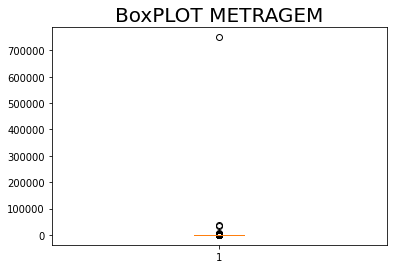

In [133]:
plt.boxplot(df["Metragem"])
plt.title("BoxPLOT METRAGEM",fontsize = 20)
plt.show()

In [134]:
df.loc[(df["Metragem"] > 5000)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000
7930,"Rua Duque de Caxias, 298",Santo Amaro,São Paulo,7126,7,2,20,R$ 80.000\n /Mês
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


In [135]:
df.loc[(df["Metragem"] < 30)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5009,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,20,3,2,2,R$ 800.000
5059,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$ 800.000
5652,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$ 800.000
8553,Rua Barra da Jangada,Parada Inglesa,São Paulo,29,1,1,1,R$ 300.000
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000


METRAGEM apresenta alguns outliers:
- acima de 5000 metros, talvez um erro de registro, principalmente quanto ao registro com metragem 750000
- abaixo de 30 metros com 3 quartos, algo estranho.

### QUARTOS

In [136]:
print( "Variável QUARTOS possui:", df["Quartos"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Quartos"].unique() ) )

Variável QUARTOS possui: 10008 registros.
Valores distinto preenchidos:   15


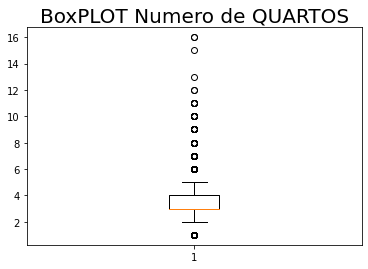

In [137]:
plt.boxplot(df["Quartos"])
plt.title("BoxPLOT Numero de QUARTOS",fontsize = 20)
plt.show()


In [138]:
df.query("Quartos <= 1")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
130,Rua Bernardo Vieira,Vila Laís,São Paulo,104,1,1,1,R$ 270.000
185,Rua Quirino Pucca,Vila Romana,São Paulo,65,1,1,2,R$ 480.000
321,NaN,Alto da Lapa,São Paulo,135,1,2,4,R$ 1.550.000
369,Rua Rodolfo Arena,Vila Moraes,São Paulo,54,1,1,2,R$ 305.000
405,NaN,Vila Madalena,São Paulo,35,1,1,1,R$ 2.800\n /Mês
...,...,...,...,...,...,...,...,...
9292,Rua Diamante Preto,Chácara Califórnia,São Paulo,120,1,1,3,R$ 420.000
9653,Rua Victória Simionato,Vila Paranaguá,São Paulo,45,1,1,1,R$ 160.000
9658,"Avenida Ouro Verde de Minas, 1948",Jardim Imperador (Zona Leste),São Paulo,292,1,1,4,R$ 646.761
9835,"Rua São Pompônio, , 53",Vila Oratório,São Paulo,120,1,1,6,R$ 426.000


In [139]:
df.loc[(df["Quartos"] < 1)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor


In [140]:
df.query("Quartos >5")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000
113,"Rua Araripe, 145",Vila Califórnia,São Paulo,300,6,3,2,R$ 430.000
166,Rua Doutor Antônio Gontijo de Carvalho,Jardim Cordeiro,São Paulo,1200,6,7,8,R$ 6.360.000
170,Rua Manuel Francisco Alves,Parque Casa de Pedra,São Paulo,232,8,3,1,R$ 500.000
196,Rua Constantino de Sousa,Campo Belo,São Paulo,266,6,6,6,R$ 1.750.000
...,...,...,...,...,...,...,...,...
9932,Rua Guararema,Bosque da Saúde,São Paulo,600,8,7,5,R$ 2.300.000
9962,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000
9968,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
9998,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000


In [141]:
df.loc[(df["Quartos"] >5)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000
113,"Rua Araripe, 145",Vila Califórnia,São Paulo,300,6,3,2,R$ 430.000
166,Rua Doutor Antônio Gontijo de Carvalho,Jardim Cordeiro,São Paulo,1200,6,7,8,R$ 6.360.000
170,Rua Manuel Francisco Alves,Parque Casa de Pedra,São Paulo,232,8,3,1,R$ 500.000
196,Rua Constantino de Sousa,Campo Belo,São Paulo,266,6,6,6,R$ 1.750.000
...,...,...,...,...,...,...,...,...
9932,Rua Guararema,Bosque da Saúde,São Paulo,600,8,7,5,R$ 2.300.000
9962,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000
9968,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
9998,Rua Eduardo Lobo,Parque Imperial,São Paulo,125,6,3,3,R$ 951.000


### BANHEIROS

In [142]:
print( "Variável Banheiros possui:", df["Banheiros"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Banheiros"].unique() ) )

Variável Banheiros possui: 10008 registros.
Valores distinto preenchidos:   15


In [143]:
df.query("Banheiros > 5")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
18,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,R$ 2.700.000
27,"Rua Andrade Neves, 37",Bela Aliança,São Paulo,502,4,6,4,R$ 2.985.000
28,Rua Japeacaba,Vila Albertina,São Paulo,268,3,6,4,R$ 1.700.000
29,Rua Senador Vergueiro,Santo Amaro,São Paulo,355,4,7,4,R$ 3.100.000
...,...,...,...,...,...,...,...,...
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000
9997,Rua Tapes,Jardim Aeroporto,São Paulo,157,5,7,4,R$ 840.000
9999,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


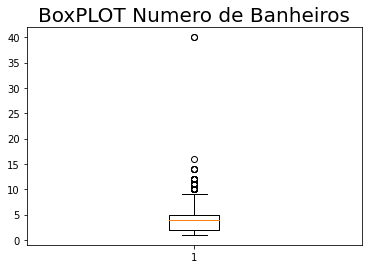

In [144]:
plt.boxplot(df["Banheiros"])
plt.title("BoxPLOT Numero de Banheiros",fontsize = 20)
plt.show()

In [145]:
df["Banheiros"].unique()

array([ 8,  4,  3,  2,  1,  5,  7,  6,  9, 10, 11, 12, 40, 14, 16])

In [146]:
df.query("Banheiros in [40]")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000


BANHEIROS apresenta outliers:
- Dois registros com 40 banheiros em imoveis com metragem de 488 metros quadrados......

### VAGAS

In [147]:
print( "Variável VAGAS possui:", df["Vagas"].count(), "registros.\nValores distinto preenchidos:  ", len(df["Vagas"].unique() ) )

Variável VAGAS possui: 10008 registros.
Valores distinto preenchidos:   28


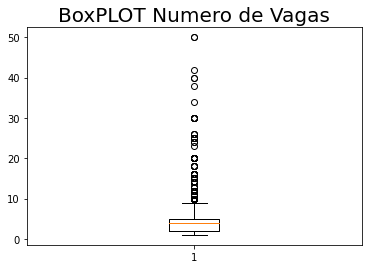

In [148]:
plt.boxplot(df["Vagas"])
plt.title("BoxPLOT Numero de Vagas",fontsize = 20)
plt.show()

In [149]:
df["Vagas"].unique()

array([ 6,  4,  2,  1,  3,  5,  8,  7, 10, 12,  9, 20, 13, 15, 25, 14, 18,
       11, 38, 30, 26, 24, 16, 42, 34, 23, 40, 50])

In [150]:
df.query("Vagas in [30,34,38,40,42,50]")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000
1598,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,R$ 8.000.000
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês
2739,NaN,Cidade Jardim,São Paulo,1530,5,5,30,R$ 90.000\n /Mês
2769,NaN,Cidade Jardim,São Paulo,1535,5,5,30,R$ 90.000\n /Mês
2837,NaN,Morumbi,São Paulo,1327,3,8,34,R$ 120.000\n /Mês
3098,NaN,Pacaembu,São Paulo,1490,5,11,40,R$ 25.000\n /Mês
3385,NaN,Pacaembu,São Paulo,1495,5,11,40,R$ 25.000\n /Mês
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000


VAGAS apresenta alguns outliers:
- Acima de 30 vagas
- Apesenta um registro duplicado ( index: 4969 e 5450)

### VALOR

In [151]:
len(df["Valor"].unique())

1041

In [152]:
df["Valor"].dtype

dtype('O')

In [153]:
df["Valor"].values[10:30]

array(['R$ 700.000', 'R$ 15.000', 'R$ 2.500.000', 'R$ 1.700.000',
       'R$ 1.150.000', 'R$ 550.000', 'R$ 420.000', 'R$ 2.232.000',
       'R$ 2.700.000', 'R$ 4.190.000', 'R$ 860.000', 'R$ 650.000',
       'R$ 490.000', 'R$ 1.485.000', 'R$ 650.000', 'R$ 550.000',
       'R$ 1.100.000', 'R$ 2.985.000', 'R$ 1.700.000', 'R$ 3.100.000'],
      dtype=object)

In [154]:
df["Valor"] = df["Valor"].str.replace(".","")
df["Valor"] = df["Valor"].str.replace("R","")
df["Valor"] = df["Valor"].str.replace("$","")
df["Valor"] = df["Valor"].str.replace("/Mês","")
df["Valor"] = df["Valor"].str.replace("\n","")
df["Valor"] = df["Valor"].str.replace("\t","")
df["Valor"] = df["Valor"].str.replace("                      ","")
df["Valor"] = df["Valor"].str.replace(" ","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
df["Valor"] =round(pd.to_numeric(df["Valor"], errors = "coerce"),2)

In [156]:
df["Valor"]

0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10003     665000.0
10004    2300000.0
10005    1050000.0
10006       2200.0
10007     270000.0
Name: Valor, Length: 10008, dtype: float64

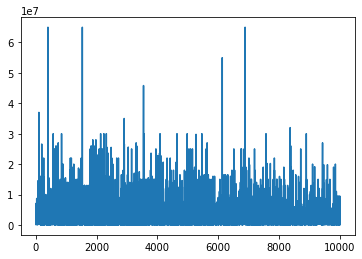

In [157]:
plt.plot(df["Valor"])
plt.show()

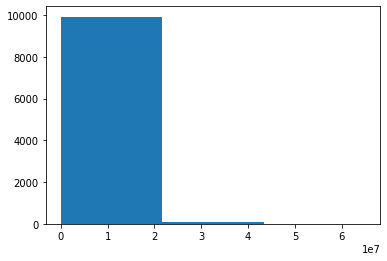

In [158]:
plt.hist(x=df["Valor"], bins = 3)
plt.show()

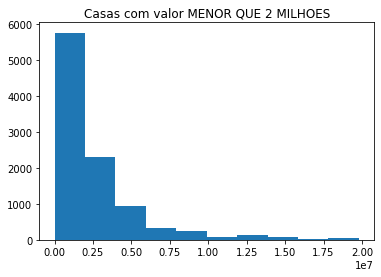

In [159]:
valor_menor_2m = df.query("Valor < 20000000")
plt.hist(valor_menor_2m["Valor"])
plt.title("Casas com valor MENOR QUE 2 MILHOES")
plt.show()

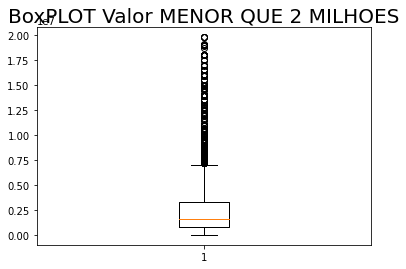

In [160]:
plt.boxplot(valor_menor_2m["Valor"])
plt.title("BoxPLOT Valor MENOR QUE 2 MILHOES",fontsize = 20)
plt.show()

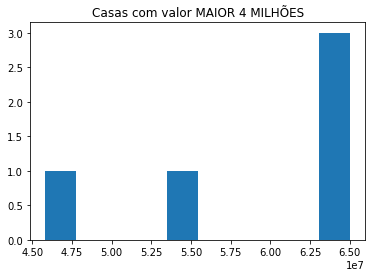

In [161]:
valor_maior_4m = df.query("Valor > 40000000")
plt.hist(valor_maior_4m["Valor"])
plt.title("Casas com valor MAIOR 4 MILHÕES")
plt.show()

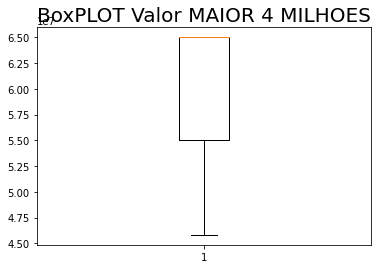

In [162]:
plt.boxplot(valor_maior_4m["Valor"])
plt.title("BoxPLOT Valor MAIOR 4 MILHOES",fontsize = 20)
plt.show()

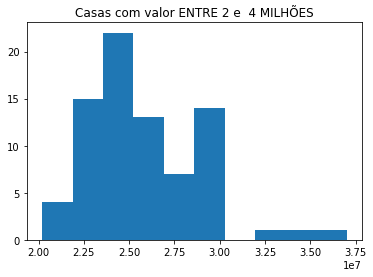

In [163]:
valor_2m_4m = df.loc[(df["Valor"] > 20000000)  & (df["Valor"] < 40000000 )]
plt.hist(valor_2m_4m["Valor"])
plt.title("Casas com valor ENTRE 2 e  4 MILHÕES")
plt.show()

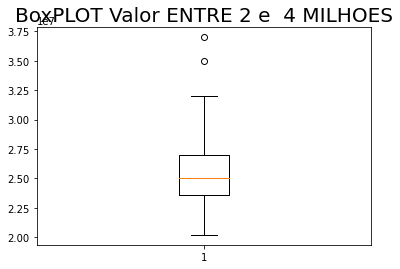

In [164]:
plt.boxplot(valor_2m_4m["Valor"])
plt.title("BoxPLOT Valor ENTRE 2 e  4 MILHOES",fontsize = 20)
plt.show()

Variavel VALOR é do tipo Objeto e não FLOAT, e alguns valores apresentam o mes junto.
É preciso fazer um tratamento antes de convertes para float

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6574 non-null   object 
 1   Bairro     9996 non-null   object 
 2   Cidade     10008 non-null  object 
 3   Metragem   10008 non-null  int64  
 4   Quartos    10008 non-null  int64  
 5   Banheiros  10008 non-null  int64  
 6   Vagas      10008 non-null  int64  
 7   Valor      10004 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


In [166]:
df["Valor"].mean()

2795283.2643942423

## <b>DESAFIOS</b>

### <b>0. DESAFIO:</b> Encontrar a Média da metragem para "Vila Mariana"

In [167]:
df.loc[(df["Bairro"] == "Vila Mariana")].describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,233.619565,3.375000,3.228261,2.929348,1.627502e+06
std,91.467315,0.983817,1.310765,1.801762,9.965323e+05
min,60.000000,1.000000,1.000000,1.000000,2.100000e+03
25%,166.000000,3.000000,2.000000,2.000000,8.875000e+05
50%,235.500000,3.000000,3.000000,2.000000,1.575000e+06
75%,285.000000,4.000000,4.000000,4.000000,2.150000e+06
max,650.000000,11.000000,8.000000,10.000000,6.500000e+06


In [182]:
print("*************************************************************")
print("Imoveis na 'Vila Mariana'\n")
print("Numero de Imoveis - {} ".format( sum(df["Bairro"] == "Vila Mariana")))
print("Média da metragem - {:.2f} - M2".format( df.loc[(df["Bairro"] == "Vila Mariana")].describe()["Metragem"][1]))
print("Mediana da metragem - {:.2f} - M2\n".format( df.loc[(df["Bairro"] == "Vila Mariana")].describe()["Metragem"][5]))
print("*************************************************************")

*************************************************************
Imoveis na 'Vila Mariana'

Numero de Imoveis - 184 
Média da metragem - 233.62 - M2
Mediana da metragem - 235.50 - M2

*************************************************************


### <b>1. DESAFIO:</b> Encontrar a Média da metragem para cada um dos bairros

In [275]:
df_por_bairros_media = df.groupby(df["Bairro"])["Metragem"].mean()
df_por_bairros_mediana = df.groupby(df["Bairro"])["Metragem"].median()
bairro_media_mediana = pd.concat([df_por_bairros_media.rename("Media"), df_por_bairros_mediana.rename("Mediana")], axis = 1)
bairro_media_mediana.sort_values(by='Media', ascending=False)

,Media,Mediana
Bairro,,
Sítio Represa,37000.000000,37000.0
Vila Castelo,2850.000000,2850.0
Jardim Guedala,2486.640199,580.0
Jardim das Camélias,1700.000000,1700.0
Chácara Flora,1260.727273,1300.0
...,...,...
Cidade Antônio Estevão de Carvalho,57.500000,57.5
Jardim Nova Germania,57.000000,57.0
Jardim Benfica,48.000000,48.0


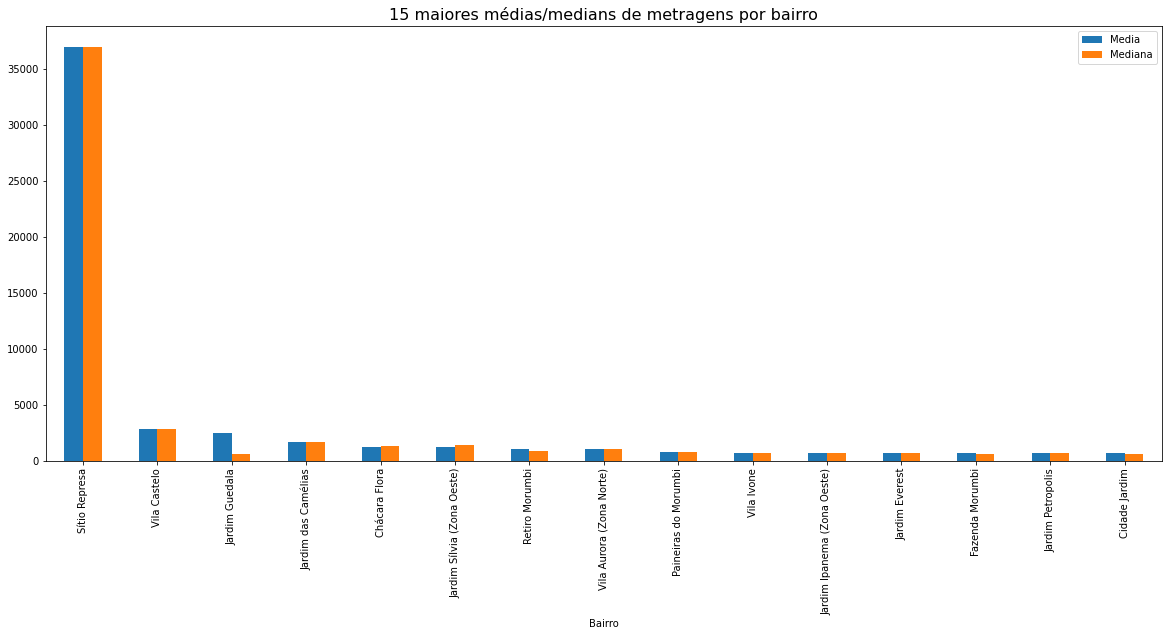

In [263]:
bairro_media_mediana.sort_values(by='Media', ascending=False)[0:15].plot.bar()
plt.title("15 maiores médias/medians de metragens por bairro",fontsize = 16)
plt.show()

In [271]:
df.loc[(df["Bairro"] == "Sítio Represa")]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,2900000.0


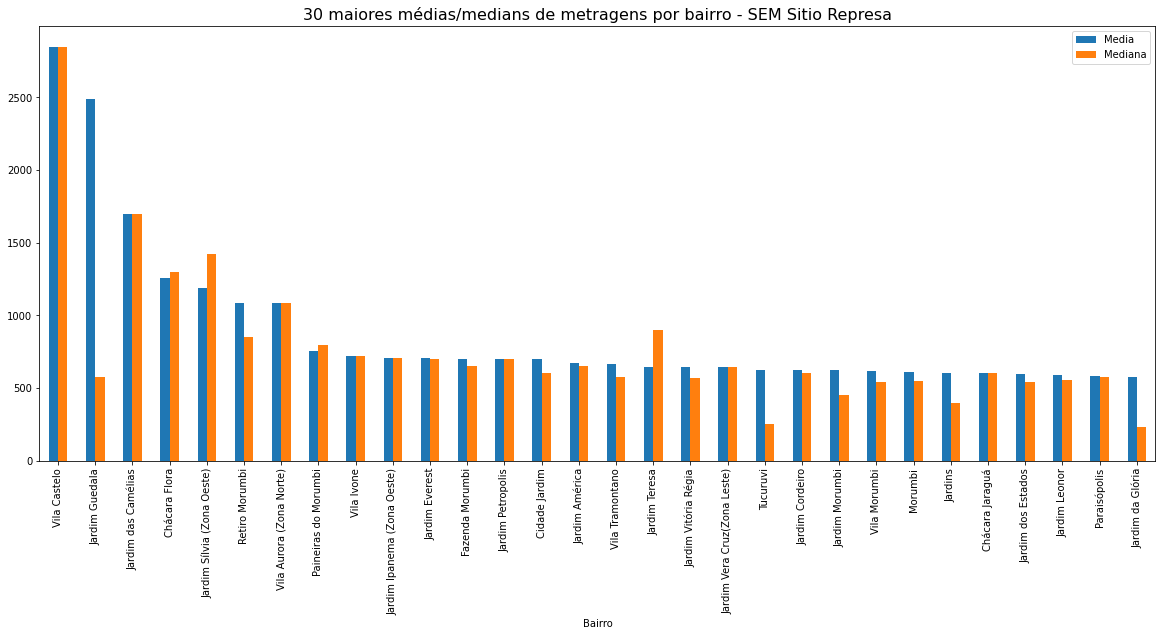

In [274]:
bairro_media_mediana.sort_values(by='Media', ascending=False)[1:31].plot.bar()
plt.title("30 maiores médias/medians de metragens por bairro - SEM Sitio Represa",fontsize = 16)
plt.show()

Comparativo Media/Mediana por bairros. 
Observa-se uma diferença grande entre os dados de Sitio Represa ,que possui apenas um imovel, com uma metragem alta, e os outros bairros.

Além disso, alguns bairros apresentam grande difereça entre media e mediana, como Jardim Guedala, Tucuruvi e Jardim da Glória, que precisam ser analisados com mais detalhes.

###<b>2. DESAFIO:</b> Duas formas de selecionar os dados por bairro

In [293]:
# Utilizando o loc.

df.loc[df["Bairro"]=="Jardins"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1951,Rua Prudente Correia,Jardins,São Paulo,290,4,6,2,5100000.0
3886,Rua Luís Pereira de Almeida,Jardins,São Paulo,360,3,4,4,3500000.0
3910,Rua Luís Pereira de Almeida,Jardins,São Paulo,365,3,4,4,3500000.0
4283,Rua Luís Pereira de Almeida,Jardins,São Paulo,400,4,3,8,2700000.0
8430,"Rua Luís Pereira de Almeida, 72",Jardins,São Paulo,400,4,3,5,2700000.0
9465,Rua Jacarezinho,Jardins,São Paulo,1200,6,7,8,19800000.0
9589,Rua Jacarezinho,Jardins,São Paulo,1205,6,7,8,19800000.0


In [329]:
# Utilizando o query
df.query("Bairro == 'Morumbi'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
171,Rua Luís Dib Zogaib,Morumbi,São Paulo,443,4,6,8,1800000.0
191,NaN,Morumbi,São Paulo,1800,3,5,6,80000.0
213,Rua Emílio Pedutti,Morumbi,São Paulo,546,4,7,6,3290000.0
343,"Avenida Comendador Adibo Ares, 1230",Morumbi,São Paulo,686,5,6,5,3350000.0
377,NaN,Morumbi,São Paulo,566,4,7,8,3500000.0
...,...,...,...,...,...,...,...,...
9486,Rua Almirante Soares Dutra,Morumbi,São Paulo,499,4,8,5,3800000.0
9527,Avenida Comendador Adibo Ares,Morumbi,São Paulo,1000,5,8,6,3350000.0
9555,Rua Almirante Soares Dutra,Morumbi,São Paulo,558,4,7,8,4800000.0
9628,Rua Almirante Soares Dutra,Morumbi,São Paulo,504,4,8,5,3800000.0


### <b>3. DESAFIO:</b> Explorar alguns gráficos e aplicar nas demais colunas do dataframe, tentar colocar alguma conclusão

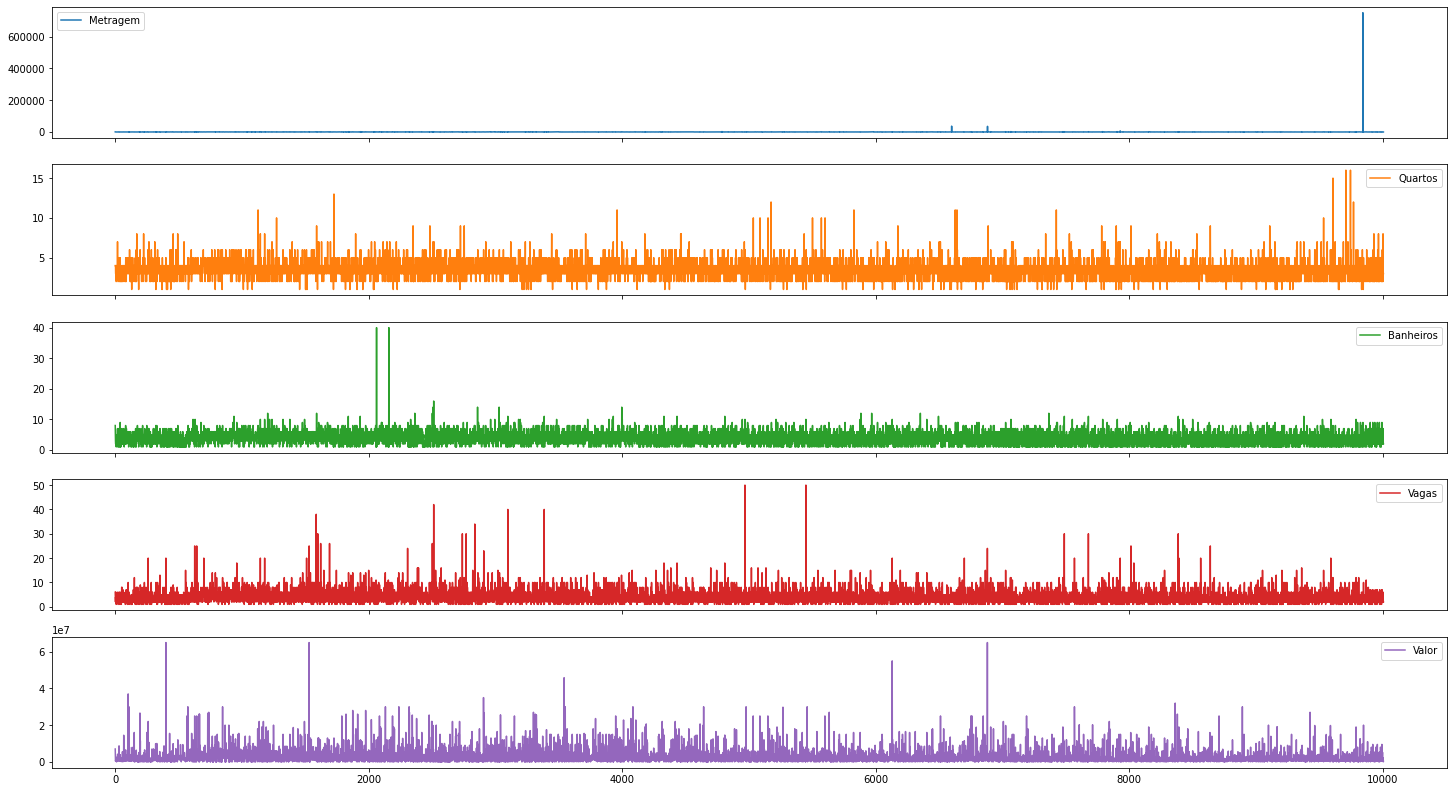

In [429]:
plt.rcParams["figure.figsize"] = (25,14)
df.plot(subplots=True);

### <b> 4. DESAFIO:</b> Pegar outros estatisticas dos dados, media, mediana, min, max

In [336]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000400e+04
mean,442.300659,3.483114,3.879097,4.097222,2.795283e+06
std,7515.379389,1.064200,1.988467,2.824014,3.866620e+06
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


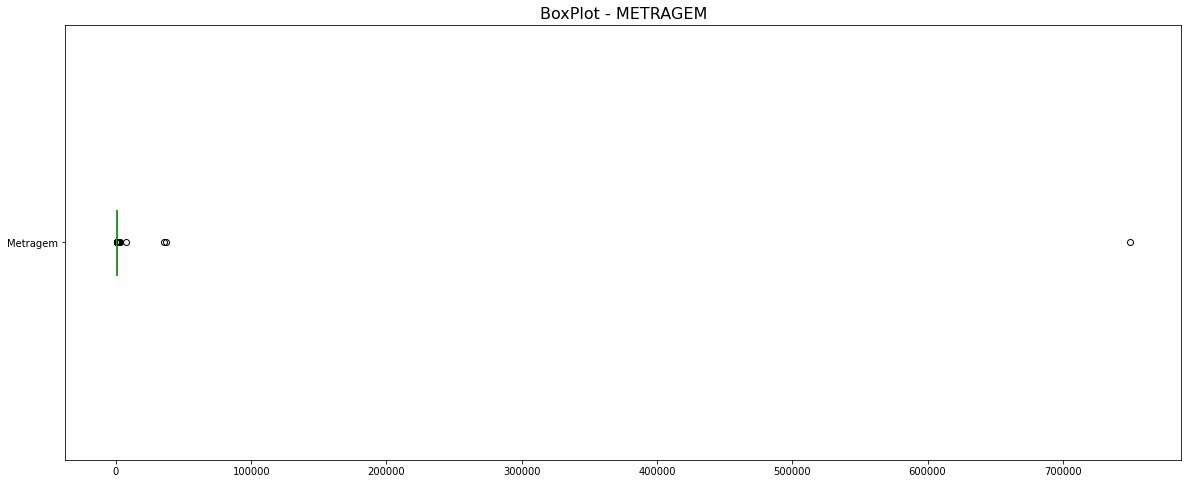

In [367]:
df[["Metragem"]].plot.box(vert=False, positions=[1])
plt.title("BoxPlot - METRAGEM",fontsize=16)
plt.show()

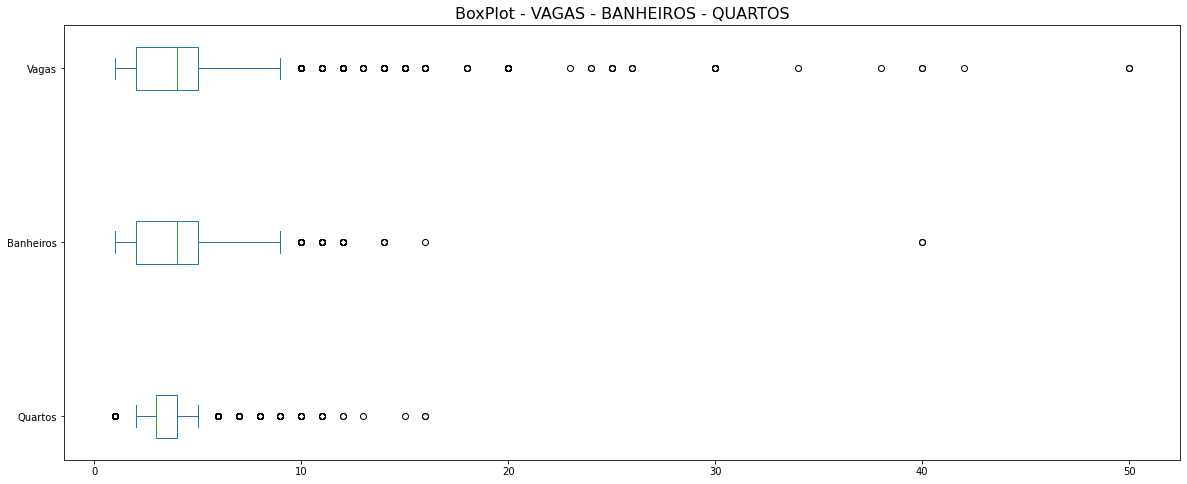

In [368]:
df[["Quartos","Banheiros", "Vagas"]].plot.box(vert=False, positions=[1, 3, 5])
plt.title("BoxPlot - VAGAS - BANHEIROS - QUARTOS",fontsize=16)
plt.show()

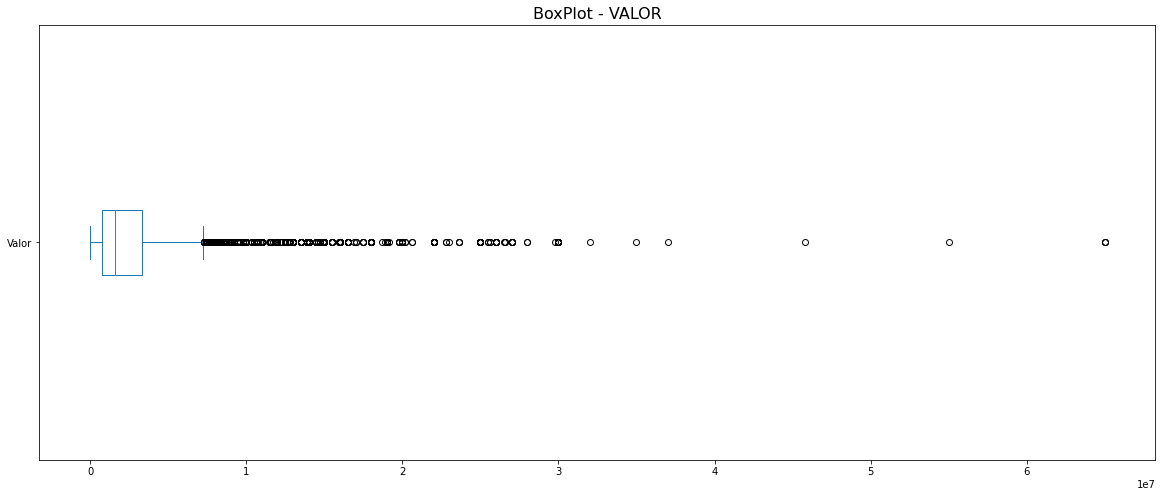

In [369]:
df[["Valor"]].plot.box(vert=False, positions=[1])
plt.title("BoxPlot - VALOR",fontsize=16)
plt.show()

Observa-se grande diferença entre media e mediana da metragem, provavelmente indicando presença de outliers.
Os dados de quartos, banheiros e vagas aparesentam valores máximos, bem distantes da media.
OS dados de valor apresentam aluns valores bem distantes da média, indicando, talvez, outliers.

### <b>5. DESAFIO:</b> Identificar quais os bairros que possuem ruas faltantes (sem nome)

In [301]:
df.loc[df["Rua"].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,15000.0
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,849000.0
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,1100000.0
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,5500000.0
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,2800000.0
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,400000.0
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,750000.0
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,9500000.0


In [311]:
df.loc[df["Rua"].isnull()].groupby(["Bairro"]).count()

,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
Bairro,,,,,,,
Aclimação,0,2,2,2,2,2,2
Alto da Boa Vista,0,1,1,1,1,1,1
Alto da Lapa,0,29,29,29,29,29,29
Alto da Mooca,0,5,5,5,5,5,5
Alto de Pinheiros,0,169,169,169,169,169,169
...,...,...,...,...,...,...,...
Vila do Encontro,0,3,3,3,3,3,3
Água Branca,0,2,2,2,2,2,2
Água Fria,0,1,1,1,1,1,1


In [327]:
bairros_rua_nan = df.loc[df["Rua"].isnull()].groupby(["Bairro"]).count().sort_values(by='Cidade', ascending=False)["Cidade"]
imoveis_por_bairro = df.groupby(["Bairro"]).count().sort_values(by='Cidade', ascending=False)["Cidade"]
bairro_rua = pd.concat([imoveis_por_bairro.rename("N_imoveis"),bairros_rua_nan.rename("Com_rua_sem_id")] , axis=1, join='outer')
bairro_rua.fillna(0,axis=1,inplace=True)
bairro_rua

,N_imoveis,Com_rua_sem_id
Bairro,,
Alto de Pinheiros,409,169.0
Jardim Guedala,403,190.0
Jardim Paulista,309,138.0
Brooklin Paulista,247,75.0
Jardim Europa,240,128.0
...,...,...
Vila Fernandes,1,0.0
Vila Fiat Lux,1,0.0
Educandário,1,0.0


In [330]:
bairro_rua.query("Com_rua_sem_id == 1")

,N_imoveis,Com_rua_sem_id
Bairro,,
Jardim Aeroporto,26,1.0
Jardim Brasil (Zona Sul),16,1.0
Água Fria,12,1.0
Chácara Belenzinho,10,1.0
Jardim das Vertentes,10,1.0
...,...,...
Vila Constancia,1,1.0
Jardim das Camélias,1,1.0
Vila Darli,1,1.0


In [335]:
bairro_rua.loc[ ( bairro_rua["Com_rua_sem_id"] == 1)  & ( bairro_rua["N_imoveis"] == 1) ]

,N_imoveis,Com_rua_sem_id
Bairro,,
Vila Sabrina,1,1.0
Vila Virginia,1,1.0
Vila Nova Pauliceia,1,1.0
Jardim Marília,1,1.0
Jardim Rizzo,1,1.0
Jardim Rincão,1,1.0
Vila Vasconcelos,1,1.0
Vila Salete,1,1.0
Jardim Santa Cruz (Campo Grande),1,1.0


In [334]:
bairro_rua.loc[ ( bairro_rua["Com_rua_sem_id"] == 1)  & ( bairro_rua["N_imoveis"] == 1) ].count()

N_imoveis         52
Com_rua_sem_id    52
dtype: int64

Encontrados 52 bairros com registro de apenas um imovel e este imovel numa rua sem identificação.

# AULA 02